<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>
- Bryan Alfredo Solórzano Montero <br>

Fecha: 13/08/2022

# Importación de librerias necesarias

In [2]:
'''Se importa la libreria cv2'''
import cv2
'''Se importa la libreria numpy'''
import numpy as np
'''Se importa la libreria os'''
import os
'''Se establece el nivel de codificación'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
'''Se importa la libreria shutil'''
import shutil
'''Se importa la libreria glob'''
import glob
'''Se importa la libreria pandas'''
import pandas as pd
'''Se importa la libreria pyplot'''
import matplotlib.pyplot as plt
'''Se importa el módulo seaborn'''
import seaborn as sn
'''Se importan el módulo ImageDataGenerator'''
from keras.preprocessing.image import ImageDataGenerator
'''Se importan los módulos array_to_img, img_to_array, load_img'''
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
'''Se importa el módulo Image'''
from  PIL  import Image
'''Se importa el módulo MinMaxScaler'''
from sklearn.preprocessing import MinMaxScaler
'''Se importa la libreria h5py'''
import h5py
'''Se importa el módulo sleep'''
from time import sleep
'''Se importa la librería patoolib'''
import patoolib
'''Se importa el módulo remove'''
from rembg import remove
'''Se importa el método io del módulo skimage'''
from skimage import io
'''Se importa el módulo random'''
import random

## Cargar el Dataset

In [65]:
'''Se establece la ruta general de espacio de trabajo'''
os.chdir('C:/Users/Personal/IA/Laboratorio1U3')

In [4]:
'''Se establece la ruta de las imágenes'''
ruta_imagenes = "./Estudiantes_datos_origen"
'''Se muestra los directorios (clases) del dataset'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordenan en orden alfabético (AZ - az)'''
nombre_clases.sort()
'''Se muestran las clases del dataset'''
print(nombre_clases)

['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon']


In [90]:
def cargarImagenes(ruta_imagenes):
    '''
    Permite imprimir randómicamente una imagen por cada clase con título y sus dimensiones.
            Parameters:
                    ruta_imagenes (str): Una cadena de texto que identifica el 
                    directorio de la clase 
            Returns:
                    No retorna nada
    '''
    '''Arreglo vacío que almacenará las fotos'''
    imagen = []
    '''Se genera un bucle para recorrer cada etiqueta de las clases'''
    for nombre_clase in nombre_clases:
        '''Se almacena la ruta actual de cada clase por ciclo'''
        ruta_actual = ruta_imagenes + "/" + nombre_clase
        '''Se obtiene una lista de los elementos por clase'''
        elementos = os.listdir(ruta_actual) 
        '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
        ran = random.randint(0, len(elementos) - 1)
        '''Se agrega al arreglo vacío un elemento aleatorio represtado como imagen'''
        imagen.append(io.imread(ruta_imagenes + "/" + nombre_clase +'/'+ elementos[ran])/255.0) 

    '''Se establece las dimensiones de contendor del gráfico'''  
    plt.figure(figsize=(10,7))
    '''Se genera un ciclo que recorrerá cada elemento del arreglo de fotos'''
    for iterador in range(len(nombre_clases)):
        '''Se establece la distribución de cada elemento en el contenedor gráfico
        donde se genera de manera dinámica en relación al número de elementos'''
        ax = plt.subplot(round(len(nombre_clases)/3),3, iterador+1)
        '''Se muestra la imagen actual del ciclo'''
        plt.imshow(imagen[iterador])
        '''Se establece un título representativo de la imaegen y se menciona su dimensión'''
        plt.title(nombre_clases[iterador] + ' ' + str(imagen[iterador].shape), color= 'white')
        plt.axis('off')

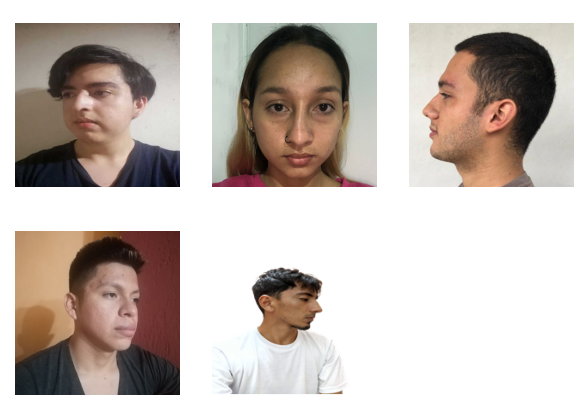

In [93]:
cargarImagenes(ruta_imagenes)

## Descripción de la fuente del Dataset

La colección de datos está conformada por cinco clases que representan a cada estudiante perteneciente a la Universidad de las Fuerzas Armadas ESPE sede Santo Domingo de la materia de Inteligencia Artificial. Cada clase tiene un total de tres imágenes del rostro del estudiante, siendo cada una para la perspectiva de frente, perfil izquierdo y derecho. Por lo tanto, se tiene un total de 15 imágenes en total. Sin embargo estas imágenes tienen dimensiones y extensiones variadas por lo que será necesario realizar una limpieza a los datos y preprocesarlos.   

## Explique el problema a resolver. 
Se pretende reconocer si una persona pertenece a la clase de Inteligencia artificial de las Fuerzas Armadas ESPE sede Santo Domingo para lo cuál se debe recolectar imágenes del rostro de cada estudiante desde diferentes perspectivas y generar un modelo predictivo. Debido a que la clase de Inteligencia Artificial tiene varios estudiantes (26 estudiates/clases) el modelo a generar es clasificatorio multi-clase y será el modelo predictivo de Redes Neuronales Convoolucionales, es decir, no etiquetado. Lo que se espera predecir es el nombre del estudiante (etiqueta) a la que pertecena la imagen de entrada. El modelo podría tener una aplicación en la universidad de las Fuerzas Armadas ESPE como sistema automático para la asistencia en la clase.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.



In [8]:
instancias = 0
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se obtiene una lista de los elementos por clase'''
    elementos = os.listdir(ruta_actual) 
    '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
    for elemento in elementos:
        '''Se contabiliza el total de instancias'''
        instancias+=1
print('Instancias en total: '+str(instancias))

Instancias en total: 15


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [77]:
def crearDirecotrio(ruta):
    '''Pasos para almacenar los nuevos datos después de usar la técnica de
    aumentos de datos'''
    '''Se crea un nuevo directorio con la ruta anterior'''
    os.mkdir(ruta)
    '''Se establece un ciclo que creará el nombre y directorio de las carpetas
    que contendrá las imágenes de cada una de las clases'''
    for clase in nombre_clases:
        '''Se asigna la ruta de la clase a una variable'''
        subdirectorio = ruta+"/"+clase
        '''Se crea un nuevo directorio con la ruta anterior'''
        os.mkdir(subdirectorio)

In [78]:
ruta = './Estudiantes_datos_aumentados'
crearDirecotrio(ruta)
ruta = './Estudiantes_datos_ruidoEliminado'
crearDirecotrio(ruta)
ruta = './Estudiantes_datos_fondoEliminado'
crearDirecotrio(ruta)

In [79]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se obtiene una lista de los elementos por clase'''
    elementos = os.listdir(ruta_actual) 
    '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
    for elemento in elementos:
        '''Se almacena la ruta de la imagen en una variable'''
        imagen = ruta_actual+'/'+elemento
        '''Se lee la ruta y se almacena la imagen leída en una variable'''
        imagen = cv2.imread(imagen)
        '''Se ajustan las dimensiones de la imagen'''
        imagen = cv2.resize(imagen, (192,192))
        '''Se almacena el prefijo del nombre de la imagen'''
        elemento = elemento[:elemento.find(".")]
        '''Se imprime un mensaje del proceso'''
        print("Copiando imagen - {} en Estudiantes_datos_aumentados/{}".format(elemento+'.jpg', nombre_clase))
        '''Se establece la ruta destino de ese elemento'''
        ruta_destino = ("C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_Aumentados/" + nombre_clase + '/') 
        '''Se copia el elemento del origen al destino cambiando el formato a jpg'''
        cv2.imwrite(os.path.join(ruta_destino, elemento+'.jpg')    , imagen)

Copiando imagen - L00393010_1.jpg en Estudiantes_datos_aumentados/GoyesAnthony
Copiando imagen - L00393010_2.jpg en Estudiantes_datos_aumentados/GoyesAnthony
Copiando imagen - L00393010_3.jpg en Estudiantes_datos_aumentados/GoyesAnthony
Copiando imagen - L00392991_1.jpg en Estudiantes_datos_aumentados/HerediaGenesis
Copiando imagen - L00392991_2.jpg en Estudiantes_datos_aumentados/HerediaGenesis
Copiando imagen - L00392991_3.jpg en Estudiantes_datos_aumentados/HerediaGenesis
Copiando imagen - L00080131_1.jpg en Estudiantes_datos_aumentados/SolorzanoBryan
Copiando imagen - L00080131_2.jpg en Estudiantes_datos_aumentados/SolorzanoBryan
Copiando imagen - L00080131_3.jpg en Estudiantes_datos_aumentados/SolorzanoBryan
Copiando imagen - L00392980_1.jpg en Estudiantes_datos_aumentados/WilmerSolano
Copiando imagen - L00392980_2.jpg en Estudiantes_datos_aumentados/WilmerSolano
Copiando imagen - L00392980_3.jpg en Estudiantes_datos_aumentados/WilmerSolano
Copiando imagen - L00392993_Centro.jpg e

# Aumento de datos (Data augmentation)

In [80]:
'''Se crea un elemento para generar imagenes según sus hiperparámetros'''
generacionDatos = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

## Aumento de datos para todas la clases 

In [81]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3/Estudiantes_datos_aumentados')
for clases in os.listdir():
    '''Se genera una ciclo que recorre cada elemento de la clase "GoyesAnthony"'''
    for elemento in os.listdir(clases):
        '''Se almacena la imagen de la ruta'''
        imagen = load_img(f"{os.getcwd()+ '/' + clases + '/' + elemento}")
        '''Se almacena un array Numpy con forma (3, 150, 150)'''
        x = img_to_array(imagen)    # this is a Numpy array with shape (3, 150, 150)
        '''Se aumenta una dimensión por ciclo que hará referencia a cada elemento'''  
        x = x.reshape((1,) + x.shape)
        '''Se inicializa un iterador'''
        iterador = 0
        '''Se genera un ciclo que corrererá cada lote de la transformación con sus
        hiperparámetros'''
        for lote in generacionDatos.flow(x, batch_size=1,
                save_to_dir="./"+str(clases), 
                save_prefix= clases, 
                save_format='jpg'):
            '''Se aumenta en una unidad en el iterador'''
            iterador += 1
            '''Se crea 5 imágenes de cada imagen'''
            if iterador == 9: 
                break  

## Filtro NLM para la eliminación de ruido de las imágenes

In [82]:
'''Se redirecciona con una ruta dinámica al directorio general
para el sistema'''
os.chdir(r'C:/Users/Personal/IA/Laboratorio1U3')
'''Se establece la ruta que contiene a las clases del dataset a usar'''
ruta_imagenes = "./Estudiantes_datos_Aumentados"
'''Se almacena los directorios de cada clase'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordena los elementos por orden alfabético'''
nombre_clases.sort()
'''Se imprimen las clases'''
print(nombre_clases)

['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon']


In [83]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:     
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se almacenan las etiquetas de las clases'''
    etiqueta_actual = nombre_clase
    '''Se genera un iterador'''
    iterador = 1
    '''Se recorre cada imagen por clase sin importar su nombre o extensión'''
    for file in glob.glob(ruta_actual + "/*"):
        '''Se imprime el proceso'''
        print("Procesando imagen - {} en {}".format(iterador, etiqueta_actual))
        '''Se leen las rutas de las imágenes'''
        imagen = cv2.imread(file)
        '''Se establece la denotación de imágenes'''
        dst = cv2.fastNlMeansDenoisingColored(imagen,None,10,10,7,21)
        '''Se divide por capa de color'''
        b,g,r = cv2.split(dst)
        '''Se unen las capas seperadas en orden (r,g,b)'''
        rgb_dst = cv2.merge([r,g,b])
        '''Se guardan las imagenes'''
        ruta_guardado = './Estudiantes_datos_ruidoEliminado/'+ etiqueta_actual
        '''Se genera cada imagen según la ruta de guardado'''
        cv2.imwrite(os.path.join(ruta_guardado , etiqueta_actual + '_' + str(iterador) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        
        '''Se muestra la actualización del bucle'''
        iterador += 1

Procesando imagen - 1 en GoyesAnthony
Procesando imagen - 2 en GoyesAnthony
Procesando imagen - 3 en GoyesAnthony
Procesando imagen - 4 en GoyesAnthony
Procesando imagen - 5 en GoyesAnthony
Procesando imagen - 6 en GoyesAnthony
Procesando imagen - 7 en GoyesAnthony
Procesando imagen - 8 en GoyesAnthony
Procesando imagen - 9 en GoyesAnthony
Procesando imagen - 10 en GoyesAnthony
Procesando imagen - 11 en GoyesAnthony
Procesando imagen - 12 en GoyesAnthony
Procesando imagen - 13 en GoyesAnthony
Procesando imagen - 14 en GoyesAnthony
Procesando imagen - 15 en GoyesAnthony
Procesando imagen - 16 en GoyesAnthony
Procesando imagen - 17 en GoyesAnthony
Procesando imagen - 18 en GoyesAnthony
Procesando imagen - 19 en GoyesAnthony
Procesando imagen - 20 en GoyesAnthony
Procesando imagen - 21 en GoyesAnthony
Procesando imagen - 22 en GoyesAnthony
Procesando imagen - 23 en GoyesAnthony
Procesando imagen - 24 en GoyesAnthony
Procesando imagen - 25 en GoyesAnthony
Procesando imagen - 26 en GoyesAnt

## Eliminando el fondo

In [101]:
'''Se establece la ruta que contiene a las clases del dataset a usar'''
ruta_imagenes = "./Estudiantes_datos_ruidoEliminado"
'''Se almacena los directorios de cada clase'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordena los elementos por orden alfabético'''
nombre_clases.sort()
'''Se imprimen las clases'''
print(nombre_clases)

In [85]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se almacenan las etiquetas de las clases'''
    etiqueta_actual = nombre_clase
    '''Se genera un iterador'''
    iterador = 1
    '''Se recorre cada imagen por clase sin importar su nombre o extensión'''
    for file in glob.glob(ruta_actual + "/*"):
        '''Se imprime el proceso'''
        print("Procesando imaegen - {} en {}".format(iterador, etiqueta_actual))
        '''Se leen las rutas de las imágenes'''
        imagen = cv2.imread(file)
        '''Se remueve el fondo'''
        salida = remove(imagen)
        '''Se guardan las imagenes'''
        ruta_guardado = './Estudiantes_datos_fondoEliminado/'+ etiqueta_actual
        '''Se genera cada imagen según la ruta de guardado'''
        cv2.imwrite(os.path.join(ruta_guardado , etiqueta_actual + '_' + str(iterador) + '.png'), salida)       
        '''Se aumenta el iterador'''
        iterador += 1

Procesando imaegen - 1 en GoyesAnthony
Procesando imaegen - 2 en GoyesAnthony
Procesando imaegen - 3 en GoyesAnthony
Procesando imaegen - 4 en GoyesAnthony
Procesando imaegen - 5 en GoyesAnthony
Procesando imaegen - 6 en GoyesAnthony
Procesando imaegen - 7 en GoyesAnthony
Procesando imaegen - 8 en GoyesAnthony
Procesando imaegen - 9 en GoyesAnthony
Procesando imaegen - 10 en GoyesAnthony
Procesando imaegen - 11 en GoyesAnthony
Procesando imaegen - 12 en GoyesAnthony
Procesando imaegen - 13 en GoyesAnthony
Procesando imaegen - 14 en GoyesAnthony
Procesando imaegen - 15 en GoyesAnthony
Procesando imaegen - 16 en GoyesAnthony
Procesando imaegen - 17 en GoyesAnthony
Procesando imaegen - 18 en GoyesAnthony
Procesando imaegen - 19 en GoyesAnthony
Procesando imaegen - 20 en GoyesAnthony
Procesando imaegen - 21 en GoyesAnthony
Procesando imaegen - 22 en GoyesAnthony
Procesando imaegen - 23 en GoyesAnthony
Procesando imaegen - 24 en GoyesAnthony
Procesando imaegen - 25 en GoyesAnthony
Procesand

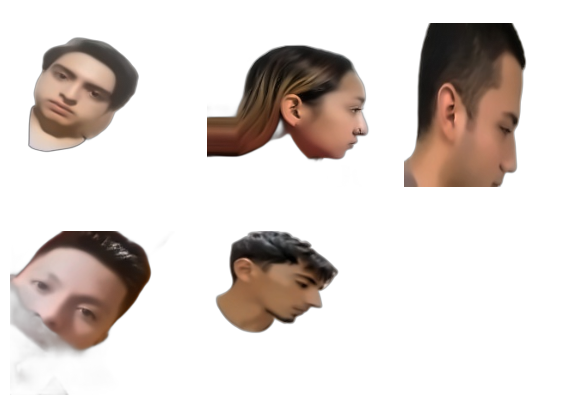

In [100]:
'''Se establece la ruta que contiene a las clases del dataset a usar'''
ruta_imagenes = "./Estudiantes_datos_fondoEliminado"
'''Se llama al método para cargar las imágenes de la ruta'''
cargarImagenes(ruta_imagenes)